In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data here

B = [0.5, 0.8, 1.0, 1.2, 1.5, 2.0, 3.0, 3.5]
probs_all_basis = [[] for i in range (len(B))]
save_samples = [[] for i in range (len(B))]
ground_state = [[] for i in range (len(B))]
prob_exact = [[] for i in range (len(B))]
ground_energy = [[] for i in range (len(B))]
for i in range (len(B)): 
    probs_all_basis[i].append(np.load("probs_all_basis"+str(B[i])+".npy"))
    save_samples[i].append(np.load("save_samples_"+str(B[i])+".npy"))
    ground_state[i].append(np.load("ground_state_Bx_"+str(B[i])+".npy"))
    ground_energy[i].append(np.load("ground_energy_Bx_"+str(B[i])+".npy"))

probs_all_basis = np.array(probs_all_basis).squeeze() # The rnn conditional probability
probs_all_basis = np.prod(probs_all_basis, axis=2) # Multiply all of them to get the probability for every basis
save_samples = np.array(save_samples).squeeze() # samples from rnn to calculate spin-spin correlation
ground_state = np.array(ground_state).squeeze() # amplitude of the exact ground state for each basis
probs_exact = ground_state**2

# From now on, exact means the result from exact diagonization, exp means the expectation value by exact calculation, emp means
# empirical estimation of the expectation value.

In [72]:
spin_correlation_emp = [[] for i in range(len(B))]

for j in range(len(B)):
    count = np.zeros(12)
    temp_correlation = np.zeros(12)
    for i in range (12):
        for k in range(12):
            temp_correlation[np.abs(k-i)]+=np.mean((2*save_samples[j,:,i]-1)*(2*save_samples[j,:,k]-1))-np.mean((2*save_samples[j,:,i]-1)*np.mean(2*save_samples[j,:,k]-1))
            count[np.abs(k-i)]+=1
    temp_correlation = temp_correlation/count
    spin_correlation_emp[j].append(temp_correlation)
print(spin_correlation)


[[array([ 1.06345696e-01,  9.87594578e-03,  1.75824039e-03,  3.23246097e-04,
        3.60695270e-05,  7.23907297e-05,  8.17604027e-05,  1.13368608e-05,
        9.54378000e-07, -5.36062400e-06, -1.02625352e-04, -1.41304160e-04])], [array([0.99999639, 0.73983282, 0.67889135, 0.64443646, 0.61803645,
       0.5932644 , 0.56757448, 0.53861635, 0.50379215, 0.4609958 ,
       0.4044186 , 0.32752875])], [array([0.99999937, 0.56971675, 0.4397035 , 0.36350168, 0.3090962 ,
       0.26628508, 0.22976083, 0.19762586, 0.16732284, 0.13820411,
       0.11001156, 0.07962191])], [array([0.99999115, 0.45333607, 0.28946961, 0.20144545, 0.14551449,
       0.10763907, 0.07990366, 0.06003115, 0.04465576, 0.03311899,
       0.0234487 , 0.01475027])], [array([0.99997895, 0.35099362, 0.17767416, 0.0984522 , 0.05697612,
       0.03447153, 0.02084706, 0.01314536, 0.00907361, 0.00559646,
       0.00331645, 0.00222997])], [array([9.99997583e-01, 2.56843570e-01, 9.68818068e-02, 3.98017577e-02,
       1.69632070e-02,

In [69]:
spin_correlation_expect = [[] for i in range(len(B))]
for j in range(len(B)):
    for i in range (11):
        p_middle = np.sum(np.split(probs_all_basis[j], 2**i), axis=0)
        p_1, p_2 = np.split(p_middle, 2)
        p_1 = np.sum(np.split(p_1, 2**(12-i-2)), axis=0)
        p_2 = np.sum(np.split(p_2, 2**(12-i-2)), axis=0)
        p = np.concatenate((p_1, p_2),axis=None)
        spin_correlation_expect[j].append(p[0]+p[-1]-p[1]-p[2]-(p[0]+p[1]-p[2]-p[3])*(p[0]-p[1]+p[2]-p[3]))
    p_itself = np.sum(np.split(probs_all_basis[j], 2**11), axis = 0)
    spin_correlation_expect[j].append(np.sum(p_itself**2)-(p_itself[0]-p_itself[1])**2)

In [70]:
spin_correlation_exact = [[] for i in range(len(B))]
for j in range(len(B)):
    for i in range (11):
        p_middle = np.sum(np.split(np.array(probs_exact[j]), 2**i), axis=0)
        p_1, p_2 = np.split(p_middle, 2)
        p_1 = np.sum(np.split(p_1, 2**(12-i-2)), axis=0)
        p_2 = np.sum(np.split(p_2, 2**(12-i-2)), axis=0)
        p = np.concatenate((p_1, p_2),axis=None)
        spin_correlation_exact[j].append(p[0]+p[-1]-p[1]-p[2]-(p[0]+p[1]-p[2]-p[3])*(p[0]-p[1]+p[2]-p[3]))
    p_itself = np.sum(np.split(probs_exact[j], 2**11), axis = 0)
    spin_correlation_exact[j].append(np.sum(p_itself**2)-(p_itself[0]-p_itself[1])**2)

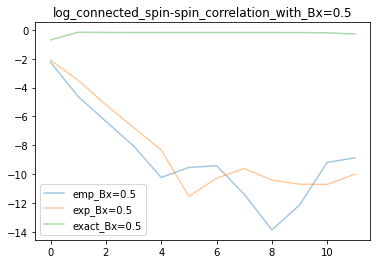

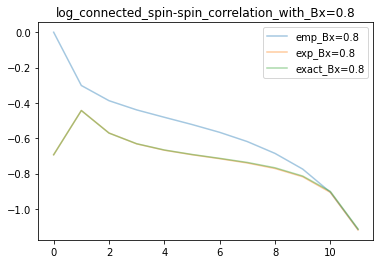

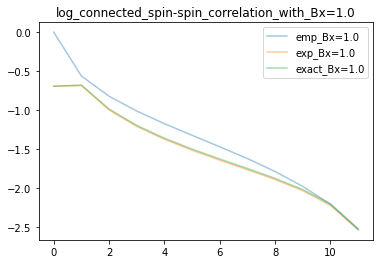

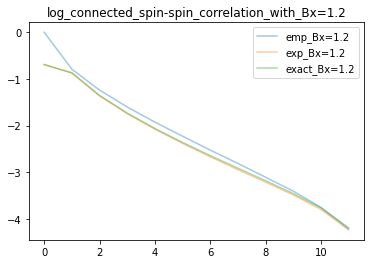

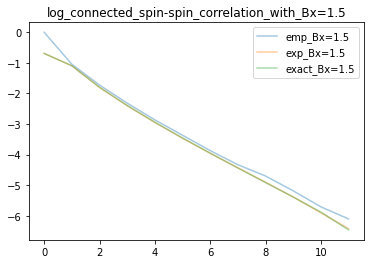

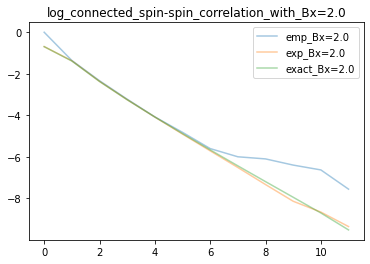

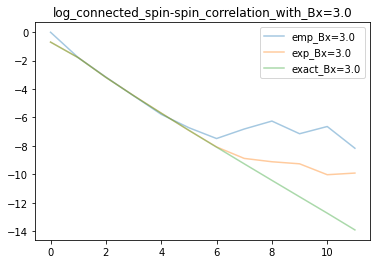

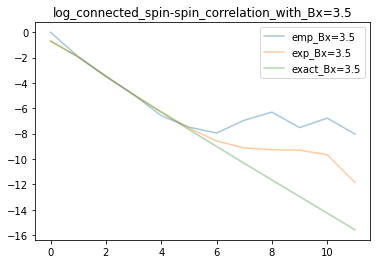

In [76]:
for j in range(len(B)):
    plt.plot(np.arange(12), np.log(np.abs(np.array(spin_correlation_emp[j])).squeeze()), label = "emp_Bx="+str(B[j]), alpha=0.4)
    plt.plot(11-np.arange(12), np.log(np.abs(np.array(spin_correlation_expect[j]))), label = "exp_Bx="+str(B[j]), alpha=0.4)
    plt.plot(11-np.arange(12), np.log(np.abs(np.array(spin_correlation_exact[j]))), label = "exact_Bx="+str(B[j]), alpha=0.4)
    plt.legend()
    plt.title("log_connected_spin-spin_correlation_with_Bx="+str(B[j]))
    plt.savefig("figure/log_cssc_Bx="+str(B[j])+".png",dpi = 150)
    plt.show()

In [295]:
# Here we consider four cuts xx|xxxxxx|xxxx|xxxx|xx, the first and the last one determine the size of ABC, the middle two
# determine how we decompose the system ABC.
N = 4096
system_size = 12
# initialization

p_abc_new = np.ones((system_size, system_size+1, N))
p_ab = np.ones((system_size, system_size, N))
p_bc = np.ones((system_size, system_size, N))
p_b = np.ones((system_size, system_size, N))

cmi = []
for i in range (system_size-1):
    cmi.append(np.array([]))
for x in range (system_size):
    for i in range (x+1,system_size):
        for j in range (i, system_size):     # i, j is the cut position
            for k in range (j+1 ,system_size+1):
                    
                p_abc_new = np.ones((system_size, system_size+1, N))
                p_ab = np.ones((system_size, system_size, N))
                p_bc = np.ones((system_size, system_size, N))
                p_b = np.ones((system_size, system_size, N))
                
                p_abc_new[x, k, :2**(k-x)] = np.sum(np.split(np.sum(np.split(p_abc, 2**k), axis = 1), 2**x) , axis = 0)
                
                p_ab[i-1, j-1, :2**(j-x)] = np.sum(np.split(p_abc_new[x, k, :2**(k-x)], 2**(j-x)), axis = 1)
                
                p_bc[i - 1, j - 1, : int(2**(k-i))] = np.sum(np.split(p_abc_new[x, k, :2**(k-x)], 2**(i-x)), axis = 0)
                if (j == i):
                    pass
                else :
                    p_b[i - 1, j - 1, : 2**(j-i)] = np.sum(np.split(p_ab[i - 1, j - 1, :2**(j-x)], 2**(i-x)), axis = 0)
                cmi[j-i] = np.append(cmi[j-i],(np.sum(-p_ab[i-1, j-1]*np.log(p_ab[i-1, j-1]) -p_bc[i-1, j-1]*np.log(p_bc[i-1, j-1]) \
                                   + p_abc_new[x, k]*np.log(p_abc_new[x,k]) + p_b[i-1, j-1]*np.log(p_b[i-1, j-1]))))
                                            

In [65]:
# The most general cmi caluclation is in the last block. Here we consider ABC partition the whole lattice and |C| = 1
# x is the 1st cut, i the second, j the third, and k the fourth. Since ABC partition the whole lattice, x = 0 and k = -1
# Further, since |C| = 1, j = -2
N = 4096
system_size = 12
cmi_exp = [[] for i in range(len(B))]
for j in range (len(B)):
    for i in range (system_size-1):
        cmi_exp[j].append(np.array([]))

cmi_exact = [[] for i in range (len(B))]
for j in range (len(B)):
    for i in range (system_size-1):
        cmi_exact[j].append(np.array([]))
tv_exact = np.zeros((len(B), system_size))
tv_expect = np.zeros((len(B), system_size))
for param in range (len(B)):
    for num in range(2):
        p_abc_new = np.ones((system_size, system_size+1, N))
        p_ab = np.ones((system_size, system_size, N))
        p_bc = np.ones((system_size, system_size, N))
        p_b = np.ones((system_size, system_size, N))

        p_AB = []
        
        if num == 0:
            p_abc=probs_exact[param]
        else:
            p_abc = probs_all_basis[param]
        x=0  # First c
        # Sorry for that I didn't clean the redundant indices from the general cmi calculation
        for i in range (x+1,system_size):
            j = system_size-1
            k = system_size
            p_abc_new = np.ones((system_size, system_size+1, N))
            p_ab = np.ones((system_size, system_size, N))
            p_bc = np.ones((system_size, system_size, N))
            p_b = np.ones((system_size, system_size, N))

            p_abc_new[x, k, :2**(k-x)] = np.sum(np.split(np.sum(np.split(p_abc, 2**k), axis = 1), 2**x) , axis = 0) 

            p_ab[i-1, j-1, :2**(j-x)] = np.sum(np.split(p_abc_new[x, k, :2**(k-x)], 2**(j-x)), axis = 1)

            p_bc[i - 1, j - 1, : int(2**(k-i))] = np.sum(np.split(p_abc_new[x, k, :2**(k-x)], 2**(i-x)), axis = 0)
            if (j == i):
                pass
            if (j!=i) :
                p_b[i - 1, j - 1, : 2**(j-i)] = np.sum(np.split(p_ab[i - 1, j - 1, :2**(j-x)], 2**(i-x)), axis = 0)

            if num==0:
                cmi_exp[param][j-i] = np.append(cmi_exp[param][j-i],(np.sum(-p_ab[i-1, j-1]*np.log(p_ab[i-1, j-1]) -p_bc[i-1, j-1]*np.log(p_bc[i-1, j-1]) \
                               + p_abc_new[x, k]*np.log(p_abc_new[x,k]) + p_b[i-1, j-1]*np.log(p_b[i-1, j-1]))))
                p_AB = np.repeat(p_ab[i-1,j-1,:2048], 2)
                p_BC = np.tile(p_bc[i-1, j-1, :int(N/2**i)], 2**i)
                p_B = np.tile(np.repeat(p_b[i-1, j-1, :2**(j-i)], 2), 2**i)
                tv_expect[param, i] = np.sum(np.abs(p_abc-p_AB*p_BC/p_B))

            if num==1:
                cmi_exact[param][j-i] = np.append(cmi_exact[param][j-i],(np.sum(-p_ab[i-1, j-1]*np.log(p_ab[i-1, j-1]) -p_bc[i-1, j-1]*np.log(p_bc[i-1, j-1]) \
                               + p_abc_new[x, k]*np.log(p_abc_new[x,k]) + p_b[i-1, j-1]*np.log(p_b[i-1, j-1]))))
                p_AB = np.repeat(p_ab[i-1,j-1,:2048], 2)           # repeat: [1,2,3]→ [1,1,2,2,3,3]
                p_BC = np.tile(p_bc[i-1, j-1, :int(N/2**i)], 2**i) # tile:   [1,2,3]→[1,2,3,1,2,3]
                p_B = np.tile(np.repeat(p_b[i-1, j-1, :2**(j-i)], 2), 2**i)
                tv_exact[param, i] = np.sum(np.abs(p_B*p_abc-p_AB*p_BC)/p_B)
                #print("ratio:", min(p_B*p_abc/p_AB*p_BC))               # I guess some rounding error must happen when calculating tv since the ratio is too big even for float64.


ratio: 1.1080553726669594e-21
ratio: 2.5030112175756906e-20
ratio: 2.4590883750225453e-18
ratio: 1.4578121169150176e-16
ratio: 1.0975079062169683e-14
ratio: 1.4321678596149367e-12
ratio: 1.0323350506069812e-10
ratio: 7.779446760129567e-09
ratio: 1.0826851073610727e-06
ratio: 7.853599663773217e-05
ratio: 0.003633761708401498
ratio: 3.487105391672061e-14
ratio: 5.261578971892641e-13
ratio: 8.51239891286165e-12
ratio: 1.5597300306441174e-10
ratio: 2.593640074224847e-09
ratio: 5.184974650416493e-08
ratio: 8.618353577937578e-07
ratio: 1.79850231292893e-05
ratio: 0.0002873323310581408
ratio: 0.006019136241662468
ratio: 0.06766013846982177
ratio: 2.649534916844309e-12
ratio: 3.027984013024328e-11
ratio: 3.5683573341457973e-10
ratio: 4.32357031331127e-09
ratio: 5.182536435871875e-08
ratio: 6.410698744662813e-07
ratio: 7.546096266641393e-06
ratio: 9.326503288933201e-05
ratio: 0.001063805670013634
ratio: 0.012582194376244546
ratio: 0.1018532042456993
ratio: 2.7369708862573678e-11
ratio: 2.618562

In [57]:
print(tv_exact)
print(tv_expect.dtype)

[[0.00000000e+00 5.82153272e-05 7.73289738e-05 8.04799042e-05
  9.72566275e-05 1.37910570e-04 1.50297391e-04 1.55099853e-04
  1.95772534e-04 4.79695988e-04 2.92785886e-03 3.05451415e-02]
 [0.00000000e+00 1.59056383e-03 3.06975489e-03 4.68129094e-03
  6.82353374e-03 1.00937774e-02 1.49178527e-02 2.24809512e-02
  3.54130109e-02 6.17039514e-02 1.18801869e-01 6.42203662e-01]
 [0.00000000e+00 9.28607765e-04 2.02878865e-03 3.54278129e-03
  5.62566190e-03 8.48760194e-03 1.24712286e-02 1.84449085e-02
  2.83052599e-02 4.73723277e-02 9.59007535e-02 5.04443267e-01]
 [0.00000000e+00 2.93263152e-04 7.42997348e-04 1.36548981e-03
  2.10831139e-03 3.17338999e-03 4.97258169e-03 8.26181787e-03
  1.46961220e-02 2.87858601e-02 7.02244588e-02 4.17063156e-01]
 [0.00000000e+00 3.28621221e-04 4.42432997e-04 5.44195477e-04
  7.52093503e-04 1.13473330e-03 1.83308425e-03 3.20998039e-03
  6.41052183e-03 1.54907877e-02 4.76170291e-02 3.34084525e-01]
 [0.00000000e+00 1.21793982e-04 1.63225075e-04 1.98410901e-04
  2

In [ ]:

log_cmi_exp = [[] for i in range (len(B))]
for j in range(len(B)):
    for i in range (system_size-1):
        log_cmi_exp[j].append(np.array([]))
        log_cmi_exp[j][i] = np.append(log_cmi_exp[j][i], np.log(cmi_exp[j][i]+1e-32))


log_cmi_data_exp = np.zeros((len(B), 11))
log_cmi_var_exp = np.zeros((len(B), 11))
for j in range(len(B)):
    for i in range (len(log_cmi_data_exp[0])):
        log_cmi_data_exp[j][i] = np.mean(log_cmi_exp[j][i])
        log_cmi_var_exp[j][i] = np.std(log_cmi_exp[j][i])

In [ ]:
log_cmi_exact = [[] for i in range (len(B))]
for j in range(len(B)):
    for i in range (system_size-1):
        log_cmi_exact[j].append(np.array([]))
        log_cmi_exact[j][i] = np.append(log_cmi_exact[j][i], np.log(cmi_exact[j][i]))

log_cmi_data_exact = np.zeros((len(B), 11))
log_cmi_var_exact = np.zeros((len(B), 11))
for j in range(len(B)):
    for i in range (len(log_cmi_exact[0])):
        log_cmi_data_exact[j][i] = np.mean(log_cmi_exact[j][i])
        log_cmi_var_exact[j][i] = np.std(log_cmi_exact[j][i])

In [ ]:
print(log_cmi_data_exact)

In [16]:
data = [[] for i in range (len(B))]
first_var = [[] for i in range (len(B))]
second_var = [[] for i in range (len(B))]
for i in range (len(B)):
    data[i].append(np.load("TV/"+str(B[i])+"/tv_"+str(B[i])+"position_11_param"+str(1)+".npy"))
    first_var[i].append(np.load("TV/"+str(B[i])+"/tv_first_var"+str(B[i])+"position_11param"+str(1)+".npy"))
    second_var[i].append(np.load("TV/"+str(B[i])+"/tv_second_var"+str(B[i])+"position_11param"+str(1)+".npy"))

In [17]:
tv_square=np.array(data)
first_var = np.array(first_var)
second_var = np.array(second_var)
tv_square_mean = np.mean(tv_square, axis = 1)
first_var_mean = np.mean(first_var, axis=1)
second_var_mean = np.mean(second_var, axis=1)

In [18]:
print(log_cmi_data_exact.shape)
print(log_cmi_data_exp.shape)
print(tv_square_mean)

(8, 11)
(8, 11)
[[2.84067197e-02 1.74504033e-03 5.48333779e-04 2.47745998e-04
  1.54268183e-04 1.42289348e-04 1.21409461e-04 8.97580236e-05
  8.23106840e-05 6.70603588e-05 6.82863817e-05 2.96816230e-07]
 [6.37854181e-01 2.84750669e-01 1.60938344e-01 1.04691592e-01
  7.23740450e-02 4.81155365e-02 3.08005476e-02 1.73220858e-02
  9.53873691e-03 5.35459641e-03 2.47548842e-03 8.38041306e-08]
 [4.98074192e-01 1.40375193e-01 6.98216123e-02 4.15431446e-02
  2.73234544e-02 1.76886996e-02 1.25451028e-02 8.56852880e-03
  4.99072781e-03 2.72751489e-03 1.21968913e-03 6.83963299e-08]
 [4.10042875e-01 8.75191724e-02 3.55297990e-02 1.79427224e-02
  9.75553411e-03 6.00188524e-03 3.82897598e-03 2.54468250e-03
  1.60718936e-03 9.06735301e-04 3.61890852e-04 7.80820847e-08]
 [3.30618488e-01 5.50598505e-02 1.75310073e-02 7.12382990e-03
  3.44955510e-03 2.01598054e-03 1.18237126e-03 8.02313745e-04
  5.67854583e-04 4.48455095e-04 3.76464605e-04 7.51614571e-08]
 [2.50609672e-01 3.14595354e-02 7.86005986e-03 2.

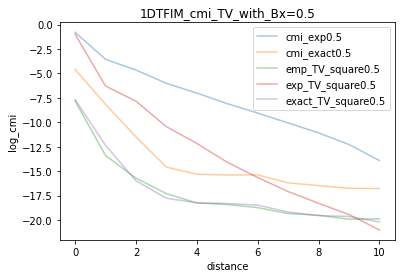

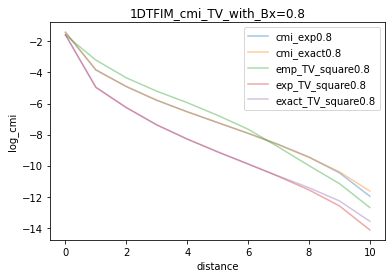

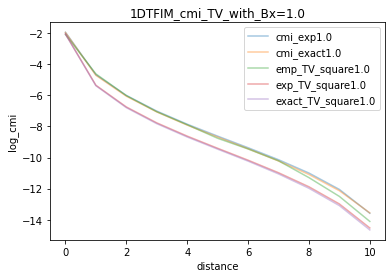

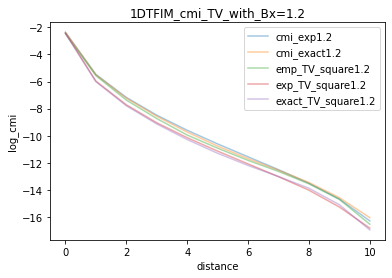

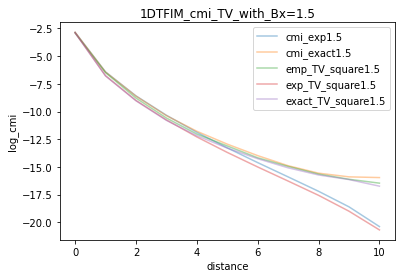

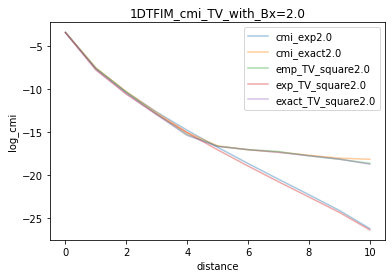

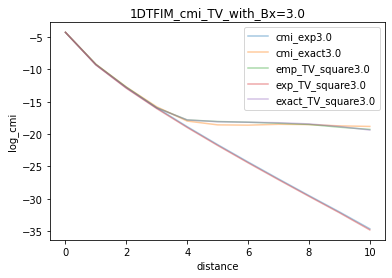

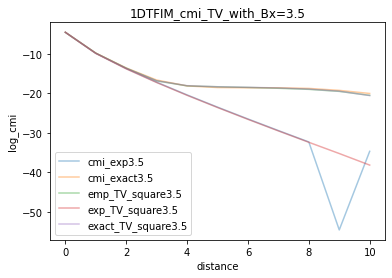

In [77]:

for i in range (len(B)):
    plt.plot(np.arange(system_size-1), log_cmi_data_exp[i] , label = "cmi_exp"+str(B[i]), alpha = 0.4)
    plt.plot(np.arange(system_size-1), log_cmi_data_exact[i], label = "cmi_exact"+str(B[i]), alpha = 0.4)
    plt.plot(np.arange(system_size-1), 2*np.log(tv_square_mean[i][:-1])-np.log(2), label="emp_TV_square"+str(B[i]), alpha = 0.4)
    plt.plot(10-np.arange(system_size-1), 2*np.log(tv_expect[i][1:])-np.log(2), label="exp_TV_square"+str(B[i]), alpha = 0.4)
    plt.plot(10-np.arange(system_size-1), 2*np.log(tv_exact[i][1:])-np.log(2), label="exact_TV_square"+str(B[i]), alpha = 0.4)
    plt.xlabel("distance")
    plt.ylabel("log_cmi")
    plt.title("1DTFIM_cmi_TV_with_Bx="+str(B[i]))
    plt.legend()
    plt.savefig("figure/CMI_TV_with_Bx="+str(B[i])+".png", dpi=200)
    plt.show()





In [ ]:
a, b = np.polyfit(np.arange(system_size-1), log_cmi_data, 1)
r2 = 1 - np.sum((a*np.arange(system_size-1)+b*np.ones(system_size-1)-log_cmi_data)**2) \
/np.sum((log_cmi_data - np.sum(log_cmi_data)/(system_size-1))**2) 
ls = 'dotted'
plt.plot(np.arange(system_size-1), a*np.arange(system_size-1)+b*np.ones(system_size-1))

In [ ]:
p_ab = np.ones((system_size, system_size, N))
log_p_ab = np.ones((system_size, system_size, N))
p_bc = np.ones((system_size, system_size, N))
log_p_bc = np.ones((system_size, system_size, N))
p_b = np.ones((system_size, system_size, N))
log_p_b = np.ones((system_size, system_size, N))
p_ab_test = np.ones((system_size, system_size, N))
for i in range (1,system_size):
    for j in range (i, system_size):     # i, j is the cut position
        p_ab[i-1, j-1, :2**j] = np.sum(np.split(p_abc, 2**j), axis = 1)
        p_bc[i - 1, j - 1, : int(N/2**i)] = np.sum(np.split(p_abc, 2**i), axis = 0)
   
        if (j == i):
            continue
        else :
            p_b[i - 1, j - 1, : 2**(j-i)] = np.sum(np.split(p_ab[i - 1, j - 1, :2**j], 2**i), axis = 0)

In [5]:
print(p_ab)
print("a")
print(p_ab_test)

[[[0.4993634  0.50063663 1.         ... 1.         1.         1.        ]
  [0.37542038 0.12394302 0.12469673 ... 1.         1.         1.        ]
  [0.3013082  0.07411218 0.03804907 ... 1.         1.         1.        ]
  ...
  [0.12576984 0.02519156 0.01163813 ... 1.         1.         1.        ]
  [0.10304874 0.02272111 0.01019917 ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]]

 [[1.         1.         1.         ... 1.         1.         1.        ]
  [0.37542038 0.12394302 0.12469673 ... 1.         1.         1.        ]
  [0.3013082  0.07411218 0.03804907 ... 1.         1.         1.        ]
  ...
  [0.12576984 0.02519156 0.01163813 ... 1.         1.         1.        ]
  [0.10304874 0.02272111 0.01019917 ... 1.         1.         1.        ]
  [1.         1.         1.         ... 1.         1.         1.        ]]

 [[1.         1.         1.         ... 1.         1.         1.        ]
  [1.         1.      

In [6]:
cmi = np.zeros((system_size, system_size))  # conditional mutual information
print(p_ab.shape)
print(p_bc.shape)
print(p_abc.shape)
for i in range (0, system_size-1):
    for j in range (i , system_size-1):
        cmi[i, j] = np.sum(-p_ab[i, j]*np.log(p_ab[i, j]) -p_bc[i, j]*np.log(p_bc[i, j]) + p_abc*log_p_abc + p_b[i, j]*np.log(p_b[i, j]))
cmi = cmi[:-1,:-1]

(10, 10, 1024)
(10, 10, 1024)
(1024,)


In [7]:

cmi_distance = np.zeros(system_size-1)

for i in range(0, system_size-1):
    for j in range(i, system_size-1):
        cmi_distance[j - i] += cmi[i, j]/(system_size-(j-i))
print(cmi_distance)

[1.76194698e-01 1.65702840e-02 4.55917992e-03 1.53114509e-03
 5.23285507e-04 1.74720736e-04 5.78626957e-05 1.97515109e-05
 6.28090736e-06]


In [8]:

a, b = np.polyfit(np.arange(system_size-1), np.log(cmi_distance), 1)
r2 = 1 - np.sum((a*np.arange(system_size-1)+b*np.ones(system_size-1)-np.log(cmi_distance))**2) \
/np.sum((np.log(cmi_distance) - np.sum(np.log(cmi_distance))/(system_size-1))**2)
r2

0.9866327332978017

No handles with labels found to put in legend.


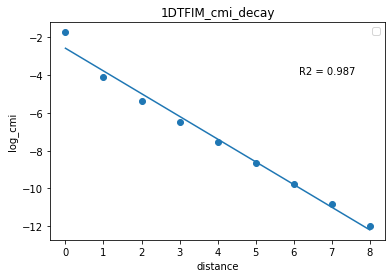

In [9]:

plt.scatter(np.arange(system_size-1), np.log(cmi_distance))
plt.plot(np.arange(system_size-1), a*np.arange(system_size-1)+b*np.ones(system_size-1))
plt.xlabel("distance")
plt.ylabel("log_cmi")
plt.figtext(0.7,0.7,'R2 = ' + str(np.round(r2,3)))
plt.title("1DTFIM_cmi_decay")
plt.legend()
plt.savefig("1DTFIM_cmi_decay.png", dpi = 200)

In [136]:
cmi

array([[ 1.02414222e+03,  9.90540048e-03, -2.84805390e-02,
        -1.24704659e-01, -1.99140819e-01, -2.47619828e-01,
        -2.84792882e-01, -3.20977706e-01, -3.52831031e-01,
        -1.02931811e+03],
       [ 0.00000000e+00,  1.02418884e+03,  1.81398781e-02,
        -9.48706211e-02, -2.01903296e-01, -3.01122722e-01,
        -4.06043003e-01, -4.68974828e-01, -5.30865417e-01,
        -1.02931811e+03],
       [ 0.00000000e+00,  0.00000000e+00,  1.02421737e+03,
         2.32592424e-02, -1.19781336e-01, -2.50526451e-01,
        -3.78778853e-01, -5.02592848e-01, -5.80311524e-01,
        -1.02931811e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.02423016e+03,  2.49832260e-02, -1.36875720e-01,
        -2.87688828e-01, -4.14257030e-01, -5.42530233e-01,
        -1.02931811e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.02422953e+03,  2.39796711e-02,
        -1.43568466e-01, -2.89370079e-01, -4.25584430e-01,
        -1.

In [200]:
a = np.array([1, 3, 2, 2,1,3,4])
auni = np.unique(a , return_index= True)
print(a[auni[1]])
auni[1]
a[np.sort(auni[1])]

[1 2 3 4]


array([1, 3, 2, 4])

In [23]:
cmi = []
for i in range (system_size-2):
    cmi.append(np.array([]))
cmi

[array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64)]

In [80]:
for i in range (1,3):
    for j in range (i+1, 4):
        print(i, j)


1 2
1 3
2 3


In [ ]:
N = 4096
system_size = 12
# initialization
cmi_exp = [[] for i in range(len(B))]
for j in range (len(B)):
    for i in range (system_size-1):
        cmi_exp[j].append(np.array([]))

cmi_exact = [[] for i in range (len(B))]
for j in range (len(B)):
    for i in range (system_size-1):
        cmi_exact[j].append(np.array([]))
for param in range (len(B)):
    for num in range(2):
        p_abc_new = np.ones((system_size, system_size+1, N))
        p_ab = np.ones((system_size, system_size, N))
        p_bc = np.ones((system_size, system_size, N))
        p_b = np.ones((system_size, system_size, N))
        if num == 0:
            p_abc=probs_exact[param]
        else:
            p_abc = probs_all_basis[param]

        for x in range (system_size):
            for i in range (x+1,system_size):
                for j in range (i, system_size):     # i, j is the cut position
                    for k in range (j+1 ,system_size+1):

                        p_abc_new = np.ones((system_size, system_size+1, N))
                        p_ab = np.ones((system_size, system_size, N))
                        p_bc = np.ones((system_size, system_size, N))
                        p_b = np.ones((system_size, system_size, N))

                        p_abc_new[x, k, :2**(k-x)] = np.sum(np.split(np.sum(np.split(p_abc, 2**k), axis = 1), 2**x) , axis = 0)

                        p_ab[i-1, j-1, :2**(j-x)] = np.sum(np.split(p_abc_new[x, k, :2**(k-x)], 2**(j-x)), axis = 1)

                        p_bc[i - 1, j - 1, : int(2**(k-i))] = np.sum(np.split(p_abc_new[x, k, :2**(k-x)], 2**(i-x)), axis = 0)
                        if (j == i):
                            pass
                        if (j!=i) :
                            p_b[i - 1, j - 1, : 2**(j-i)] = np.sum(np.split(p_ab[i - 1, j - 1, :2**(j-x)], 2**(i-x)), axis = 0)
                        if num==0:
                            cmi_exp[param][j-i] = np.append(cmi_exp[param][j-i],(np.sum(-p_ab[i-1, j-1]*np.log(p_ab[i-1, j-1]) -p_bc[i-1, j-1]*np.log(p_bc[i-1, j-1]) \
                                           + p_abc_new[x, k]*np.log(p_abc_new[x,k]) + p_b[i-1, j-1]*np.log(p_b[i-1, j-1]))))
                        if num==1:
                            cmi_exact[param][j-i] = np.append(cmi_exact[param][j-i],(np.sum(-p_ab[i-1, j-1]*np.log(p_ab[i-1, j-1]) -p_bc[i-1, j-1]*np.log(p_bc[i-1, j-1]) \
                                           + p_abc_new[x, k]*np.log(p_abc_new[x,k]) + p_b[i-1, j-1]*np.log(p_b[i-1, j-1]))))